## Sea Temperature Image Service

In [1]:
from arcgis.features import SpatialDataFrame
from arcgis.raster import ImageryLayer
from arcgis.geometry import Geometry
from arcgis.gis import GIS

gis = GIS()

In [2]:
img_svc ="https://sampleserver6.arcgisonline.com/arcgis/rest/services/ScientificData/SeaTemperature/ImageServer"
img_lyr = ImageryLayer(img_svc)

### Put layer on map - ocean temps at 4 m depth

In [3]:
map_4 = gis.map()
map_4

MapView(layout=Layout(height='400px', width='100%'))

In [4]:
selected_4 = img_lyr.filter_by(where="StdZ = -4")

In [5]:
map_4.add_layer(selected_4)

### Depth at 150 m

In [9]:
selected_150 = img_lyr.filter_by(where="StdZ = -150")

In [10]:
map_150 = gis.map()
map_150

MapView(layout=Layout(height='400px', width='100%'))

In [17]:
map_150.add_layer(selected_150)

### Depth at 1250 m

In [12]:
selected_1250 = img_lyr.filter_by(where="StdZ = -1250")

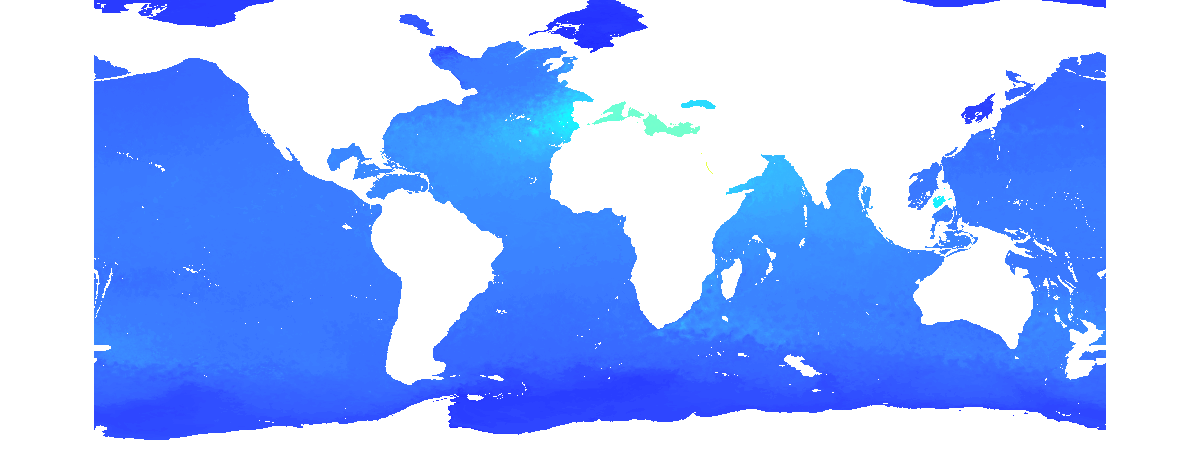

In [13]:
selected_1250

### What rasters were filtered? Create Pixel Profile - Ocean temp as function of depth

In [14]:
img_sdf = img_lyr.query().df

In [15]:
img_sdf.head()

,Category,CenterX,CenterY,Dimensions,GroupName,HighPS,LowPS,MaxPS,MinPS,Name,OBJECTID,ProductName,Shape_Area,Shape_Length,StdTime,StdZ,Tag,Variable,ZOrder,SHAPE
0,1,5.684342e-14,5.684342e-14,"StdTime, StdZ",374D92CB923FA36D5FC1671135624EEC,0.08,0.08,2,0,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,1,NetCDF,57628.8,1040.16,1396828800000,0,water_temp,water_temp,None,"{'rings': [[[-167.18283359999998, -80.03999999..."
1,1,5.684342e-14,5.684342e-14,"StdTime, StdZ",E3C284936B86AF1824615DA6DB8A4001,0.08,0.08,2,0,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,2,NetCDF,57628.8,1040.16,1396828800000,-2,water_temp,water_temp,None,"{'rings': [[[-167.18283359999998, -80.03999999..."
2,1,5.684342e-14,5.684342e-14,"StdTime, StdZ",AC4E2C5D9479A0C1C34B1654007F30C4,0.08,0.08,2,0,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,3,NetCDF,57628.8,1040.16,1396828800000,-4,water_temp,water_temp,None,"{'rings': [[[-167.18283359999998, -80.03999999..."
3,1,5.684342e-14,5.684342e-14,"StdTime, StdZ",7153862BAFD00BD1FF65449693A2B0E1,0.08,0.08,2,0,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,4,NetCDF,57628.8,1040.16,1396828800000,-6,water_temp,water_temp,None,"{'rings': [[[-167.18283359999998, -80.03999999..."
4,1,5.684342e-14,5.684342e-14,"StdTime, StdZ",487FF566AD8D5ACFCFB86080DFD4C9CD,0.08,0.08,2,0,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,5,NetCDF,57628.8,1040.16,1396828800000,-8,water_temp,water_temp,None,"{'rings': [[[-167.18283359999998, -80.03999999..."


In [16]:
len(img_sdf)

1000

In [19]:
time = 1396828800000
t0_sdf = img_sdf[img_sdf.StdTime==time]

In [20]:
len(t0_sdf)

40

In [21]:
depth = []
for idx,row in enumerate(t0_sdf.iterrows()):
    print(row[1]['StdZ'])
    depth.append(float(row[1]['StdZ']))

0
-2
-4
-6
-8
-10
-12
-15
-20
-25
-30
-35
-40
-45
-50
-60
-70
-80
-90
-100
-125
-150
-200
-250
-300
-350
-400
-500
-600
-700
-800
-900
-1000
-1250
-1500
-2000
-2500
-3000
-4000
-5000


In [22]:
from arcgis.geometry import Point

temperatures = []
for idx,row in enumerate(t0_sdf.iterrows()):
    print("StdZ = "+str(row[1]['StdZ']))
    #pixel_location = Point({"x" : -1.028714269305154E7, "y" : 1.0187890995779932E7, "spatialReference" : {"wkid" : 102100}})
    # -5,059,736.486  2,913,876.614
    selected = img_lyr.filter_by(where="StdZ = "+str(row[1]['StdZ']))
    
    pixel_location = Point({"x" : 0, "y" : 0, "spatialReference" : {"wkid" : 4326}})
    t = time
    pixel = selected.identify(geometry=pixel_location, time_extent=t)
    temperatures.append(float(pixel['value']))

StdZ = 0
StdZ = -2
StdZ = -4
StdZ = -6
StdZ = -8
StdZ = -10
StdZ = -12
StdZ = -15
StdZ = -20
StdZ = -25
StdZ = -30
StdZ = -35
StdZ = -40
StdZ = -45
StdZ = -50
StdZ = -60
StdZ = -70
StdZ = -80
StdZ = -90
StdZ = -100
StdZ = -125
StdZ = -150
StdZ = -200
StdZ = -250
StdZ = -300
StdZ = -350
StdZ = -400
StdZ = -500
StdZ = -600
StdZ = -700
StdZ = -800
StdZ = -900
StdZ = -1000
StdZ = -1250
StdZ = -1500
StdZ = -2000
StdZ = -2500
StdZ = -3000
StdZ = -4000
StdZ = -5000


ValueError: could not convert string to float: 'NoData'

In [23]:
len(temperatures)

39

Text(0,0.5,'Depth')

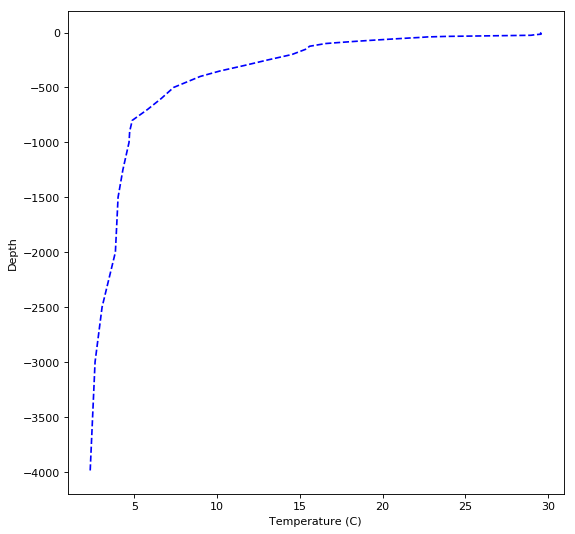

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(temperatures[:39],depth[:39],  "--b",label='linear') #indicde 0 is max
plt.xlabel('Temperature (C)')
plt.ylabel('Depth')